In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("./data/winequality-red.csv",delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.columns = df.columns.str.replace(' ', '_')
for col in df.columns: 
    print(col) 

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
quality


## simple linear regression

In [7]:
#y=df.pH.values
#x=df.fixed_acidity.values

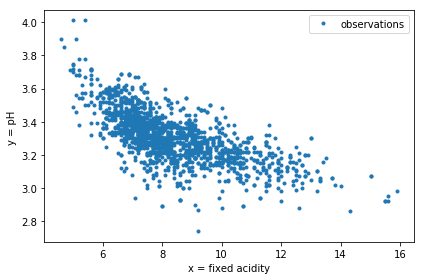

In [9]:
#plot observations
#plt.plot(x,y,'.',label='observations')
#plt.legend(loc='upper right')
#plt.xlabel("x = fixed acidity")
#plt.ylabel("y = pH ")
#plt.tight_layout()

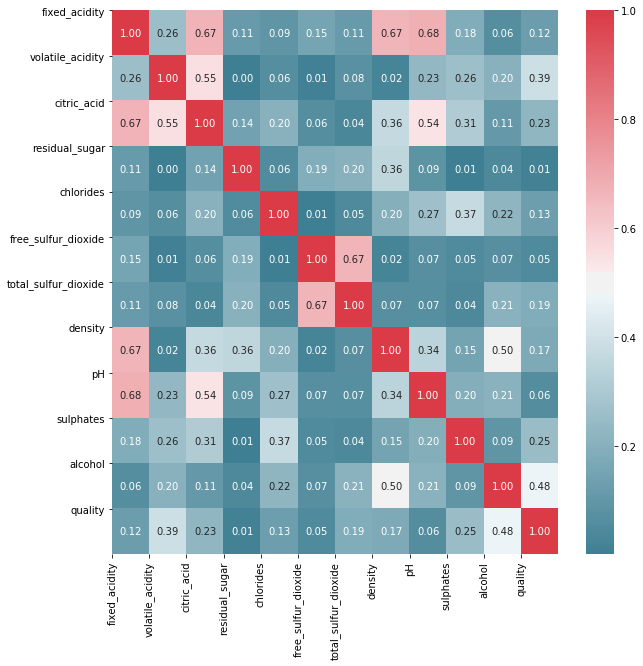

In [83]:
import seaborn as sns
def heatMap(df):
    #Create Correlation df
    corr = abs(df.corr())
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(df)

In [24]:
#take 30% of the data as sample
size_selected=round(df.shape[0]*0.3)
indexes=np.sort(np.random.choice(df.shape[0],size=size_selected,replace=False))
sample_df=df.loc[indexes,:]

In [25]:
sample_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5


In [26]:
sample_df.shape

(480, 12)

In [107]:
from sklearn.model_selection import train_test_split
traindf,testdf = train_test_split(sample_df, test_size=0.8, random_state=42)

In [108]:
#xtrain=traindf.drop(['pH','quality'],axis=1)
#xtest=testdf.drop(['pH','quality'],axis=1)

xtrain=traindf.loc[:,['pH','density','citric_acid']]
xtest=testdf.loc[:,['pH','density','citric_acid']]
ytrain=np.array(traindf.fixed_acidity)
ytest=np.array(testdf.fixed_acidity)

In [109]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
ypredict=regressor.predict(xtest)

In [110]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-396.55275594415673
[ -5.10726284 422.55393525   2.77382873]


In [115]:
from sklearn.metrics import mean_squared_error
#accuracy score
print(regressor.score(xtrain, ytrain))

print(mean_squared_error(ypredict, ytest))
print(mean_squared_error(ytrain, regressor.predict(xtrain)))

print('Coefficients: \n', regression.coef_, regression.intercept_)


0.7739426144574448
0.8400059596634434
0.7174486462138376
Coefficients: 
 [-9.95692757e-02 -6.71798555e-02 -3.91925534e-02 -3.06711721e-02
 -1.80286582e-01  2.48588097e-03 -6.51777947e-04  7.53304541e+01
 -1.79461252e-01  8.62498063e-02 -1.11306628e-02] -71.53445203288919


In [101]:
from sklearn import metrics
accuracy = metrics.explained_variance_score(ytest, ypredict)
print(accuracy)

0.7104203641794284


## k-nearest neighbors

In [116]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [117]:
knnreg.fit(xtrain, ytrain)
r2 = knnreg.score(xtest, ytest)
r2

0.4871305963052972

In [118]:
knnreg.score(xtrain,ytrain)

0.6247756454526682

Text(0, 0.5, '$R^{2}$')

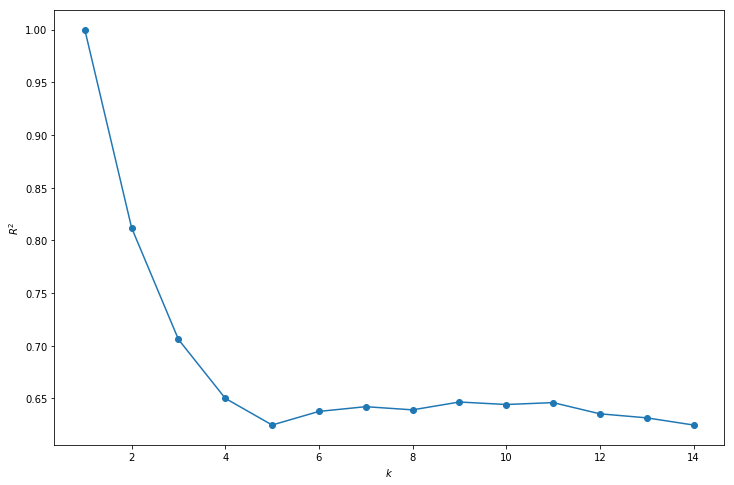

In [120]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(xtrain, ytrain) # Fit the model to training data
    score_train = knnreg.score(xtrain, ytrain) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Text(0, 0.5, '$R^{2}$')

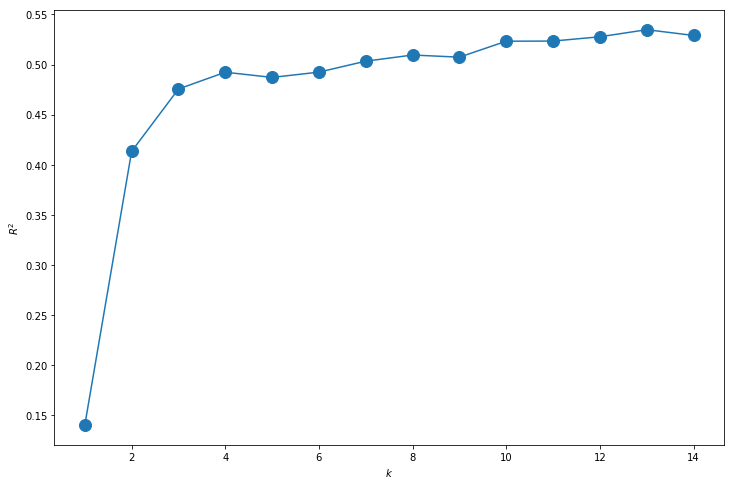

In [123]:
# now we see the score on test data set
ks = range(1, 15) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(xtrain, ytrain) # Fit the model to training data
    score_test = knnreg.score(xtest, ytest) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,'o-', ms=12)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')